In [2]:
# import required modules
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading and processing dataset

In [3]:
# Read names
with open('kddcup.names', 'r') as names:
    print(names.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

In [5]:
# Split our columns
columns= []
for c in cols.split(','):
    if(c.strip()):
        columns.append(c.strip())
columns.append('target')
print(len(columns))

42


In [6]:
# Read attack types
with open('training_attack_types', 'r') as types:
    print(types.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l


In [7]:
attack_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l'
}

In [8]:
# Reading Dataset
df = pd.read_csv('kddcup.data_10_percent.gz', names= columns)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


### Differentiating between nominal, binary, and numeric features

In [9]:
# root_shell is marked as a continuous feature in the kddcup.names 
# file, but it is supposed to be a binary feature according to the 
# dataset documentation

col_names = np.array(columns)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

print('> nominal columns\n\n', nominal_cols, '\n')
print('>> binary columns\n\n', binary_cols, '\n' )
print('>>> numeric columns\n\n', numeric_cols)

> nominal columns

 ['protocol_type', 'service', 'flag'] 

>> binary columns

 ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login'] 

>>> numeric columns

 ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [10]:
# let's go to attack types for our record
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories

category = defaultdict(list)
category['benign'].append('normal')

with open('datasets/training_attack_types.txt', 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

# Data Exploration

In [11]:
df['target'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [12]:
df['target'].nunique()

23

In [13]:
# look at the number for each attack and normal records
df['target'].value_counts().sort_values(ascending= False)

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

## we can see
normal : 97278(normal) from 494021(records) --> 396743 (attacks)
the number of attack records is much bigger than **normal** records. This **imbalance** data can lead our model to fail in the classification task, but we will fixed soon.. :)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

# Data Preprocessing

Set a column for attack type rely on target column, 
and set **only five** types we previous added by attacks_types`

In [15]:
df['Attack_type'] = df.target.apply(lambda r:attack_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [16]:
df['Attack_type'].nunique()

5

In [17]:
df['Attack_type'].unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

**normal**: Just a normal -_-

**(DoS)**: is an attack meant to shut down a machine or network,
making it inaccessible to its intended users

**(U2R)**: is an attack where hackers exploit some vulnerabilities to
gain root access to the system

**(R2L)**: occurs when the attacker finds vulnerable points in a
computer or network security software to gain access to the machine or the system

**probe** is made to gather information on the targeted
system

In [18]:
df['Attack_type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack_type, dtype: int64

In [19]:
df.shape

(494021, 43)

In [20]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### zero Nulls :)

### Finding categorical features

In [21]:
num_cols = df._get_numeric_data().columns

cat_cols = list(set(df.columns) - set(num_cols))
cat_cols

['service', 'protocol_type', 'flag', 'target', 'Attack_type']

### remove target and Attack type for now

In [22]:
cat_cols.remove('target')
cat_cols.remove('Attack_type')

In [23]:
cat_cols

['service', 'protocol_type', 'flag']

### Show our Categorical Distribution

In [24]:
# Set a function for visualing a bar_char
def bar_char(features):
    df[features].value_counts().plot(kind= 'bar', color= 'teal')

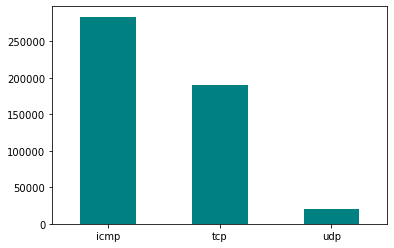

In [25]:
bar_char('protocol_type')
plt.xticks(rotation= 360);

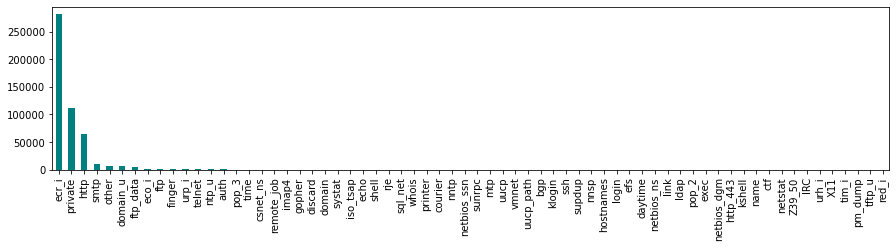

In [26]:
plt.figure(figsize= (15,3))
bar_char('service')

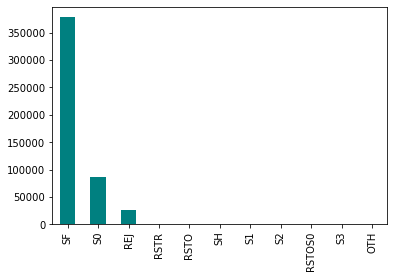

In [27]:
bar_char('flag')

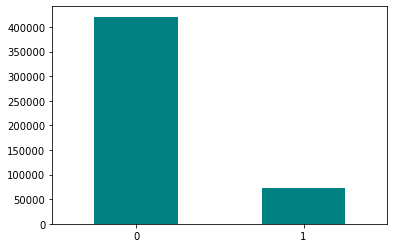

In [28]:
# Look at looged colums 'binary'
bar_char('logged_in')
plt.xticks(rotation= 360);

logged_in (1 if successfully logged in; 0 otherwise)
We **notice** that just 70000 packets are successfully logged in.

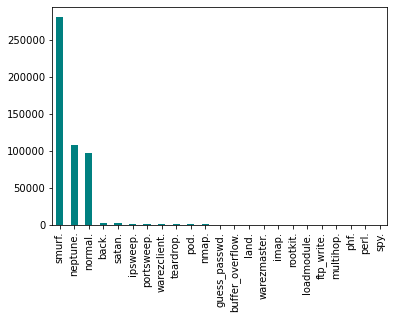

In [29]:
# look at Attack_type features distribution
bar_char('target')

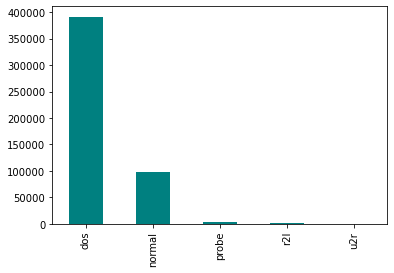

In [30]:
bar_char('Attack_type')

## Looking at Correlation between columns

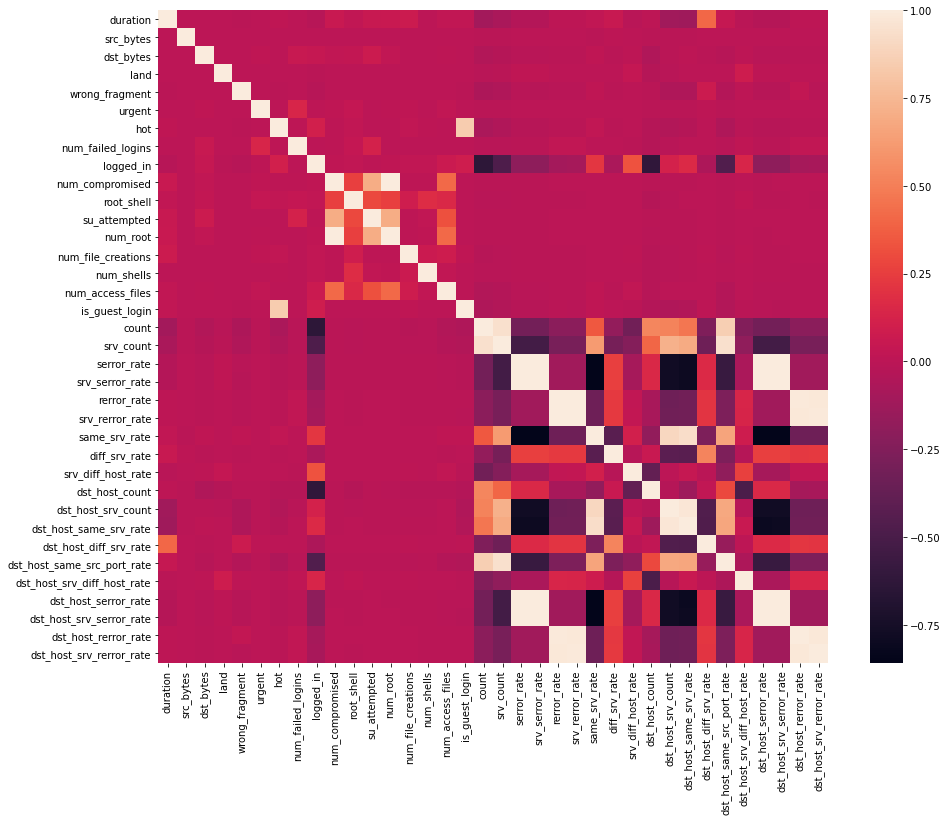

In [31]:
# drop columns with NaN
df = df.dropna('columns')

# keep columns where there are more than 1 unique values
df = df[[col for col in df if df[col].nunique() > 1]]

# set correlation
corr = df.corr()

# set figure size
plt.figure(figsize=(15, 12))

# Visualiz it with heatmap 
sea.heatmap(corr)

plt.show()

### Look at some correlated columns

In [32]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737942

In [33]:
df['srv_count'].corr(df['count'])

0.9436670688882602

In [34]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272552

In [35]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818258

In [36]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572954081

In [37]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173372515

In [38]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110593

In [39]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.927808034269101

In [40]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630324231

In [41]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783239

In [42]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.998672968010501

In [43]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373953

In [44]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924955924

In [45]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308904

In [46]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751091

In [47]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845588

In [48]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485679238

In [49]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091850208

In [50]:
# The variable is highly correlated should be ignored for analysis.
#corr: 0.99382
df.drop('num_root', axis= 1, inplace= True)

#corr: 0.99836
df.drop('srv_serror_rate', axis= 1, inplace= True)

#corr: 0.99473
df.drop('srv_rerror_rate', axis= 1, inplace= True)

#corr: 0.99815
df.drop('dst_host_srv_serror_rate', axis= 1, inplace= True)

#corr: 0.99867
df.drop('dst_host_serror_rate', axis= 1, inplace= True)

#corr: 0.98699
df.drop('dst_host_rerror_rate', axis= 1, inplace= True)

#corr: 0.98519
df.drop('dst_host_srv_rerror_rate', axis= 1, inplace= True)

#corr: 0.97368
df.drop('dst_host_same_srv_rate', axis= 1, inplace= True)


In [51]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [52]:
# Calculate standard dev for dataframe
df_std= df.std()
df_std= df_std.sort_values(ascending= True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

## Feature Mapping

In [53]:
# look at protocol types
df['protocol_type'].value_counts().sort_values()

udp      20354
tcp     190065
icmp    283602
Name: protocol_type, dtype: int64

In [54]:
# Set feature mapping for protocols
pro_map = {'udp': 0, 'tcp': 1, 'icmp': 2}
df['protocol_type'] = df['protocol_type'].map(pro_map)

In [55]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_type
0,0,1,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [56]:
df['protocol_type'].unique()

array([1, 0, 2], dtype=int64)

In [57]:
# look at falgs 
df['flag'].value_counts().sort_values()

OTH            8
S3            10
RSTOS0        11
S2            24
S1            57
SH           107
RSTO         579
RSTR         903
REJ        26875
S0         87007
SF        378440
Name: flag, dtype: int64

In [58]:
# Set feature mapping for flags
flag_map = {'OTH': 0, 'S3': 1, 'RSTOS0': 2, 'S2': 3, 'S1': 4, 'SH': 5,
           'RSTO': 6, 'RSTR': 7, 'REJ': 8, 'S0': 9, 'SF': 10}
df['flag'] = df['flag'].map(flag_map)

In [59]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_type
0,0,1,http,10,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,10,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,10,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,10,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,10,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [60]:
df['flag'].unique()

array([10,  4,  8,  3,  9,  1,  6,  7,  2,  0,  5], dtype=int64)

In [61]:
# we can ignore column of 'service' for now he is not usefull right in our case
df.drop('service', axis= 1, inplace= True)

In [62]:
df.shape

(494021, 32)

In [63]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

### allright data types now Fine !

# Modeling 

In [64]:
# import required modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [65]:
# Handle our dataset
df= df.drop(['target',], axis= 1)
print(df.shape)

# Target variable and train set
y = df[['Attack_type']]
X = df.drop(['Attack_type', ], axis= 1)

# Standard Scalar
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split to test and train data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.33, random_state= 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


#### Now we need to fixed imbalance classes berfore apply our algorithms to rich out the best.
https://imbalanced-learn.org/stable/index.html

# Dealing with class imbalance

In [66]:
y_test.value_counts().apply(lambda x: x/float(len(y_test)))

Attack_type
dos            0.791930
normal         0.197311
probe          0.008269
r2l            0.002374
u2r            0.000117
dtype: float64

In [67]:
y_train.value_counts().apply(lambda x: x/float(len(y_train)))

Attack_type
dos            0.792619
normal         0.196714
probe          0.008335
r2l            0.002233
u2r            0.000100
dtype: float64

In [68]:
y_train.value_counts()

Attack_type
dos            262352
normal          65111
probe            2759
r2l               739
u2r                33
dtype: int64

We can see   **dos**: from 391458 to 262352
            **normal**: from 97278 to 65111

#### Implement Oversampling
refers to intelligently generating synthetic data points for
minority classes

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'auto', random_state= 0)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

Attack_type
dos            262352
normal         262352
probe          262352
r2l            262352
u2r            262352
dtype: int64

#### Implement Undersampling 
refers to sampling the overrepresented class(es) to reduce the
number of samples.

In [70]:
from imblearn.under_sampling import RandomUnderSampler

mean_class_size = int(y_train.value_counts().sum()/5)

ratio = {'dos': mean_class_size,
         'normal': mean_class_size,
         'probe': mean_class_size,
         'r2l': mean_class_size,
         'u2r': mean_class_size}
rus = RandomUnderSampler(sampling_strategy= ratio, random_state= 0, replacement= True)
X_train_rus, y_train_rus = rus.fit_resample(X_train_sm, y_train_sm)
y_train_rus.value_counts()

Attack_type
dos            66198
normal         66198
probe          66198
r2l            66198
u2r            66198
dtype: int64

## Apply Gaussian Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
modGNB = GaussianNB()

In [72]:
# Calculate our time training model
s_time= time.time()
modGNB.fit(X_train_rus, y_train_rus.values.ravel())# Using to Return a contiguous flattened values from y_train.
e_time= time.time()

In [73]:
print('Training time: ', e_time-s_time)

Training time:  0.9606235027313232


In [74]:
# Calculate our time testing model
s_time= time.time()
pred_modGNB = modGNB.predict(X_test)
e_time= time.time()

In [75]:
print('Testing time: ', e_time-s_time)

Testing time:  0.3005814552307129


In [76]:
# evaluate a score for both train and test
print('Train score is: ', modGNB.score(X_train_rus, y_train_rus))
print('Test score is: ', modGNB.score(X_test, y_test))

Train score is:  0.7937641620592767
Test score is:  0.8802529642329184


## Apply Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
modDT = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4)

In [78]:
# Calculate our time training model
s_time= time.time()
modDT.fit(X_train_rus, y_train_rus.values.ravel())# Using to Return a contiguous flattened values from y_train.
e_time= time.time()

In [79]:
print('Training time: ', e_time-s_time)

Training time:  2.077519416809082


In [80]:
# Calculate our time testing model
s_time= time.time()
pred_modDT = modDT.predict(X_test)
e_time= time.time()

In [81]:
print('Testing time: ', e_time-s_time)

Testing time:  0.023993492126464844


In [82]:
# evaluate a score for both train and test
print('Train score is: ', modDT.score(X_train_rus, y_train_rus))
print('Test score is: ', modDT.score(X_test, y_test))

Train score is:  0.9215474787757938
Test score is:  0.9560440908561159


## Apply Random Rorest 

In [83]:
from sklearn.ensemble import RandomForestClassifier
modRF= RandomForestClassifier(n_estimators= 30)

In [84]:
# Calculate our time training model
s_time= time.time()
modRF.fit(X_train_rus, y_train_rus.values.ravel())# Using to Return a contiguous flattened values from y_train.
e_time= time.time()

In [85]:
print('Training time: ', e_time-s_time)

Training time:  10.982484102249146


In [86]:
# Calculate our time testing model
s_time= time.time()
pred_modRF = modRF.predict(X_test)
e_time= time.time()

In [87]:
print('Testing time: ', e_time-s_time)

Testing time:  0.4870898723602295


In [88]:
# evaluate a score for both train and test
print('Train score is: ', modRF.score(X_train_rus, y_train_rus))
print('Test score is: ', modRF.score(X_test, y_test))

Train score is:  0.9999848938034381
Test score is:  0.9994663460653757


## Apply Support Vector Machine

In [89]:
from sklearn.svm import SVC
modSVM = SVC(gamma= 'scale')

In [90]:
# Calculate our time training model
s_time= time.time()
modSVM.fit(X_train_rus, y_train_rus.values.ravel())# Using to Return a contiguous flattened values from y_train.
e_time= time.time()

In [91]:
print('Training time: ', e_time-s_time)

Training time:  685.3784263134003


In [92]:
# Calculate our time testing model
s_time= time.time()
pred_modSVM = modSVM.predict(X_test)
e_time= time.time()

In [93]:
print('Testing time: ', e_time-s_time)

Testing time:  563.9377031326294


In [94]:
# evaluate a score for both train and test
print('Train score is: ', modSVM.score(X_train_rus, y_train_rus))
print('Test score is: ', modSVM.score(X_test, y_test))

Train score is:  0.9739629596060304
Test score is:  0.9917498328497734


Here we can notice SVM algorithm is late :(

## Apply Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
modLR = LogisticRegression(max_iter= 1200000)

In [96]:
# Calculate our time training model
s_time= time.time()
modLR.fit(X_train_rus, y_train_rus.values.ravel())# Using to Return a contiguous flattened values from y_train.
e_time= time.time()

In [97]:
print('Training time: ', e_time-s_time)

Training time:  105.90997266769409


In [98]:
# Calculate our time testing model
s_time= time.time()
pred_modLR = modLR.predict(X_test)
e_time= time.time()

In [99]:
print('Testing time: ', e_time-s_time)

Testing time:  0.029862403869628906


In [100]:
# evaluate a score for both train and test
print('Train score is: ', modLR.score(X_train_rus, y_train_rus))
print('Test score is: ', modLR.score(X_test, y_test))

Train score is:  0.9422913078944983
Test score is:  0.9796536769982886


## Apply Gradient Boosting

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
modGB = GradientBoostingClassifier(random_state= 0)

In [102]:
# Calculate our time training model
s_time= time.time()
modGB.fit(X_train_rus, y_train_rus.values.ravel())# Using to Return a contiguous flattened values from y_train.
e_time= time.time()

In [103]:
print('Training time: ', e_time-s_time)

Training time:  514.6790626049042


In [104]:
# Calculate our time testing model
s_time= time.time()
pred_modGB = modGB.predict(X_test)
e_time= time.time()

In [105]:
print('Testing time: ', e_time-s_time)

Testing time:  1.2446503639221191


In [106]:
# evaluate a score for both train and test
print('Train score is: ', modGB.score(X_train_rus, y_train_rus))
print('Test score is: ', modGB.score(X_test, y_test))

Train score is:  0.9973322456871809
Test score is:  0.9973930698595939


## Apply Artificial Neural Network

In [107]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [108]:
def func():
    model = Sequential()
    
    # here 30 is output dimension
    model.add(Dense(30, input_dim= 30, activation= 'relu', kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    
    model.add(Dense(1, activation='sigmoid', kernel_initializer= 'random_uniform'))
    
    # 5 classes: normal, dos, probe, r2l, u2r
    model.add(Dense(5, activation= 'softmax'))
    
    # loss is categorical_crossentropy which specifies that we have multiple classes
    model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    
    return model

**Note:** Since,the dataset is very big and we cannot fit complete data at once so we use **batch size**.
This **divides** our data into batches each of size equal to batch_size.
Now only this number of samples will be loaded into memory and processed. 
Once we are done with one batch it is flushed from memory and the next batch will be processed.

In [109]:
modNN = KerasClassifier(build_fn= func, epochs= 100, batch_size= 64)

In [110]:
start = time.time()
modNN.fit(X_train_rus, y_train_rus.values.ravel())
end = time.time()

Epoch 1/100
5172/5172 [==============================] - 14s 708us/step - loss: 1.2984 - accuracy: 0.4389
Epoch 2/100
5172/5172 [==============================] - 4s 716us/step - loss: 0.9239 - accuracy: 0.6012
Epoch 3/100
5172/5172 [==============================] - 4s 712us/step - loss: 0.8308 - accuracy: 0.6157
Epoch 4/100
5172/5172 [==============================] - ETA: 0s - loss: 0.7729 - accuracy: 0.68 - 4s 712us/step - loss: 0.7728 - accuracy: 0.6866
Epoch 5/100
5172/5172 [==============================] - 4s 716us/step - loss: 0.7262 - accuracy: 0.7217
Epoch 6/100
5172/5172 [==============================] - 4s 708us/step - loss: 0.6921 - accuracy: 0.7371
Epoch 7/100
5172/5172 [==============================] - 4s 731us/step - loss: 0.6685 - accuracy: 0.7501
Epoch 8/100
5172/5172 [==============================] - 4s 710us/step - loss: 0.6443 - accuracy: 0.7679
Epoch 9/100
5172/5172 [==============================] - 4s 715us/step - loss: 0.6214 - accuracy: 0.7920
Epoch 10/100

In [111]:
print('Training time',end - start)

Training time 384.8384850025177


In [112]:
s_time = time.time()
y_test_pred = modNN.predict(X_test)
e_time = time.time()

In [113]:
print('Testing time', e_time - s_time)

Testing time 1.557352066040039


In [114]:
s_time = time.time() 
y_train_pred = modNN.predict(X_train_rus)
e_time = time.time()

In [115]:
accuracy_score(y_train_rus, y_train_pred)

0.9870630532644491

In [116]:
accuracy_score(y_test, y_test_pred)

0.9928723462984659

# Visualize Training Accuracy

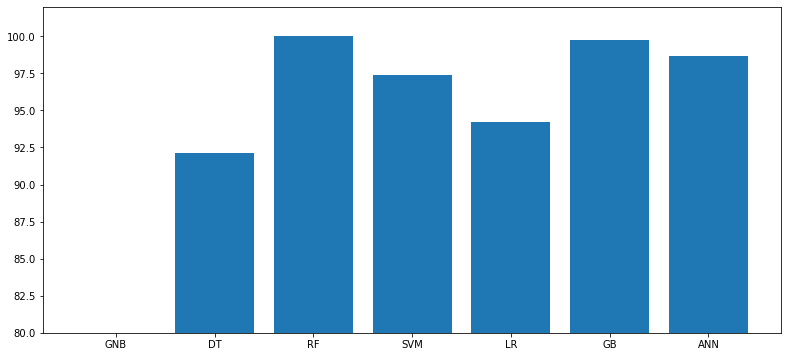

In [3]:
alg_names = ['GNB', 'DT', 'RF', 'SVM', 'LR', 'GB', 'ANN']
vals_train = [79.37, 92.15, 99.99, 97.39, 94.22, 99.73, 98.70]

figure = plt.figure(figsize= (45,6), num=10)
plt.subplot(131)
plt.ylim(80, 102)
plt.bar(alg_names, vals_train);

In [8]:
# Save bar to png # Save bar to png 
figure.savefig('training_accuracy_figure.png', bbox_inches= 'tight')

# Visualize Testing Accuracy

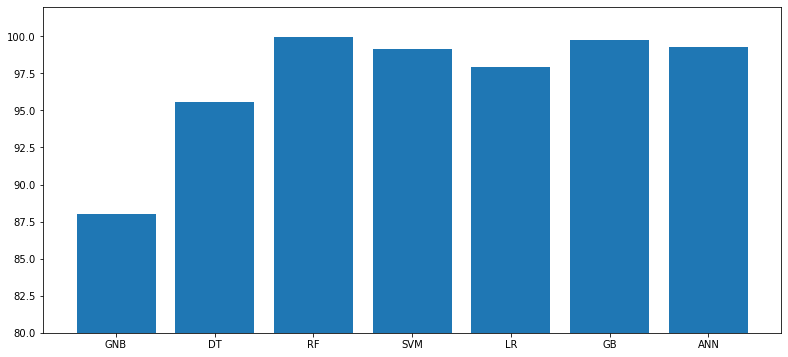

In [5]:
alg_names = ['GNB', 'DT', 'RF', 'SVM', 'LR', 'GB', 'ANN']
vals_test = [88.02, 95.60, 99.94, 99.17, 97.96, 99.73, 99.28]

figure = plt.figure(figsize= (45,6), num=10)
plt.subplot(131)
plt.ylim(80, 102)
plt.bar(alg_names, vals_test);

In [9]:
# Save bar to png 
figure.savefig('testing_accuracy_figure.png', bbox_inches= 'tight')

# Training Time

<BarContainer object of 7 artists>

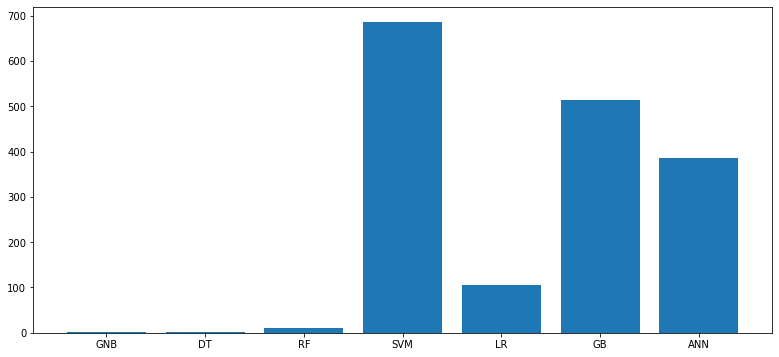

In [6]:
alg_names = ['GNB', 'DT', 'RF', 'SVM', 'LR', 'GB', 'ANN']
vals_test = [0.9606, 2.077, 10.982, 685.378, 105.909, 514.679, 384.838]

figure = plt.figure(figsize= (45,6), num=10)
plt.subplot(131)
plt.bar(alg_names, vals_test)

In [10]:
# Save bar to png 
figure.savefig('training_time_figure.png', bbox_inches= 'tight')

# Testing Time

<BarContainer object of 7 artists>

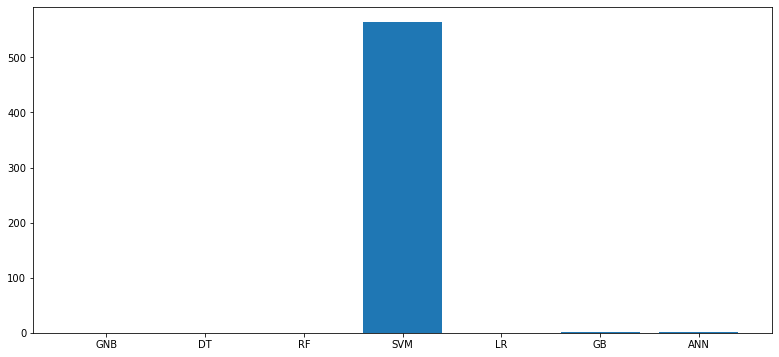

In [7]:
alg_names = ['GNB', 'DT', 'RF', 'SVM', 'LR', 'GB', 'ANN']
vals_test = [0.3005, 0.2399, 0.4870, 563.937, 0.0298, 1.2446, 1.557]

figure = plt.figure(figsize= (45,6), num=10)
plt.subplot(131)
plt.bar(alg_names, vals_test)

In [11]:
# Save bar to png 
figure.savefig('testing_time_figure.png', bbox_inches= 'tight')

# Now we can say Random forest The best based on accuracy and time.